# BibRec: Training Random Forest Model

### Features used: Country, State, Age, Year-of-Publication, Publisher
This predictions is limited to the top 50 rated books


In [3]:
# Specify where to save the model
model_file = "rf-model-limited-to-top-books.pkl"

In [4]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='../data/normalized_books.csv',
                                            users_path='../data/normalized_users.csv',
                                            ratings_path='../data/normalized_ratings.csv')


books = books.drop(["isbn"], axis=1)
ratings = ratings.drop(["isbn"], axis=1)

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:392: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(ratings_path, sep=",", encoding="utf-8", na_filter=False)


In [5]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,33.722536,nyc,new_york,usa,0.00,0.0
1,2,18.000000,stockton,california,usa,0.00,1.0
2,3,33.030485,moscow,other,other,0.00,0.0
3,4,17.000000,porto,other,portugal,0.00,0.0
4,5,59.370940,farnborough,other,united_kingdom,0.00,0.0
...,...,...,...,...,...,...,...
278853,278854,24.872503,portland,oregon,usa,5.25,8.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.00,0.0
278855,278856,47.469696,brampton,ontario,canada,0.00,0.0
278856,278857,36.158853,knoxville,other,usa,0.00,0.0


In [6]:
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9


In [7]:
ratings

,user_id,book_rating,isbn13,normalized_rating
0,276726,5,9780155061224,-1.5
1,276729,3,9780521656153,0.0
2,276729,6,9780521795029,4.0
3,276744,7,9780385501200,2.0
4,276747,9,9780060517793,4.6
...,...,...,...,...
383957,276704,7,9780743211383,
383958,276704,5,9780806917696,
383959,276704,9,9781563526299,
383960,276709,10,9780515107661,


In [8]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:50]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

/tmp/ipykernel_99706/1946061310.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_ratings = top_ratings[:50]


,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
5,9780590353427
6,9780142001745
7,978044667227
8,9780440237228
9,9780452282155


In [9]:
top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')
top_ratings

,isbn13,user_id,book_rating,normalized_rating
0,9780316666343,277439,7,4.726027
1,9780316666343,277752,7,5.804348
2,9780316666343,278633,9,4.894118
3,9780316666343,638,10,0.0
4,9780316666343,709,3,2.865385
...,...,...,...,...
12007,9780316776967,262940,9,
12008,9780316776967,264321,6,
12009,9780316776967,266588,7,
12010,9780316776967,268622,7,


In [10]:
encoded_books = hot_encode_books(books)
encoded_books

hot encoding books


,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3,...,0,0,0,0,0,0,0,0,0,0
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4,...,0,0,0,0,0,0,0,0,0,0
2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14,...,0,0,0,0,0,0,0,0,0,0
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6,...,0,0,0,0,0,0,0,0,0,0
4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17,...,0,0,0,0,0,0,0,0,0,0
270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14,...,0,0,0,0,0,0,0,0,0,0
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1,...,0,0,0,0,0,0,0,0,0,0
270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9,...,0,0,0,0,0,0,0,0,0,0


In [11]:
encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_argentina,country_australia,country_austria,country_brazil,country_canada,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,1,33.722536,nyc,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,stockton,0.00,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,33.030485,moscow,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,17.000000,porto,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,59.370940,farnborough,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,24.872503,portland,5.25,8.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278855,50.000000,tacoma,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278856,47.469696,brampton,0.00,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
278856,278857,36.158853,knoxville,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,9780195153446,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9780002005012,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780060973124,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780374157067,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780393045215,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270940,978052544763,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270941,9780060086671,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270942,9780192126047,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_argentina,country_australia,country_austria,country_brazil,country_canada,country_china,country_france,country_germany,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,1,33.722536,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,33.030485,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,59.370940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,24.872503,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278855,50.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278856,47.469696,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278856,278857,36.158853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780316666343,277439,7
1,9780316666343,277752,7
2,9780316666343,278633,9
3,9780316666343,638,10
4,9780316666343,709,3
...,...,...,...
12007,9780316776967,262940,9
12008,9780316776967,264321,6
12009,9780316776967,266588,7
12010,9780316776967,268622,7


In [15]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9780316666343,277752,7,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,9780316666343,278633,9,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,9780316666343,638,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,709,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,9780316776967,262940,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12008,9780316776967,264321,6,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12009,9780316776967,266588,7,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12010,9780316776967,268622,7,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Training the model

In [17]:
# Features
X = df.drop(['user_id', 'book_rating'], axis=1)
X

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12008,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
12009,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
12010,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [18]:
# Prediction
Y = df['book_rating']
Y

0         7
1         7
2         9
3        10
4         3
         ..
12007     9
12008     6
12009     7
12010     7
12011     7
Name: book_rating, Length: 12012, dtype: int64

### Data splitting
To measure the Precision & Recall of the model, the dataset is split into 70% of training data, and 30% of test data.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [20]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Creating new model: rf-model-limited-to-top-books.pkl


In [21]:
rfc.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.4s


building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [22]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [23]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


array([7, 6, 7, ..., 6, 4, 6])

In [24]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.15      0.09      0.12        32
           2       0.10      0.14      0.12        36
           3       0.08      0.04      0.06        71
           4       0.02      0.02      0.02        60
           5       0.08      0.07      0.08       253
           6       0.08      0.07      0.08       245
           7       0.14      0.15      0.14       524
           8       0.26      0.29      0.28       885
           9       0.21      0.19      0.20       720
          10       0.30      0.30      0.30       778

    accuracy                           0.21      3604
   macro avg       0.14      0.14      0.14      3604
weighted avg       0.21      0.21      0.21      3604

21.004439511653718


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks  

Confusion matrix, without normalization
[[  3   5   3   0   3   5   2   7   2   2]
 [  2   5   1   2   6   3   6   4   3   4]
 [  1   3   3   3  11   9  14  11   9   7]
 [  1   2   4   1   3   7  12  15   7   8]
 [  6   5   4   4  18  19  42  69  41  45]
 [  3   6   4   5  22  18  32  67  46  42]
 [  1   5   4   7  38  37  77 156 100  99]
 [  2   6   4  13  52  53 135 259 186 175]
 [  0   6   5   9  33  40 124 198 140 165]
 [  1   5   4  12  33  38  98 210 144 233]]
Normalized confusion matrix
[[0.09 0.16 0.09 0.   0.09 0.16 0.06 0.22 0.06 0.06]
 [0.06 0.14 0.03 0.06 0.17 0.08 0.17 0.11 0.08 0.11]
 [0.01 0.04 0.04 0.04 0.15 0.13 0.2  0.15 0.13 0.1 ]
 [0.02 0.03 0.07 0.02 0.05 0.12 0.2  0.25 0.12 0.13]
 [0.02 0.02 0.02 0.02 0.07 0.08 0.17 0.27 0.16 0.18]
 [0.01 0.02 0.02 0.02 0.09 0.07 0.13 0.27 0.19 0.17]
 [0.   0.01 0.01 0.01 0.07 0.07 0.15 0.3  0.19 0.19]
 [0.   0.01 0.   0.01 0.06 0.06 0.15 0.29 0.21 0.2 ]
 [0.   0.01 0.01 0.01 0.05 0.06 0.17 0.28 0.19 0.23]
 [0.   0.01 0.01 0.02 0.

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


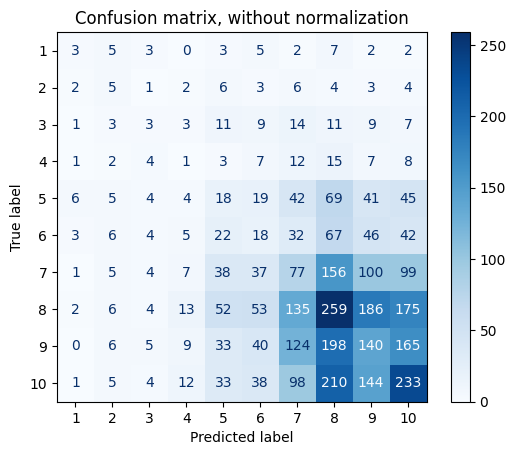

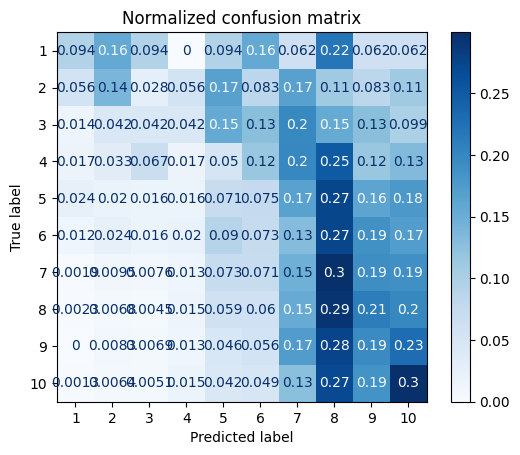

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9223358705994291

In [27]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.605530
1,normalized_year_of_publication,0.118782
0,isbn13,0.106386
61,state_other,0.013417
47,state_california,0.009284
...,...,...
3,publisher_bantam_books,0.000000
6,publisher_harlequin,0.000000
8,publisher_harpercollins_publishers,0.000000
5,publisher_fawcett_books,0.000000


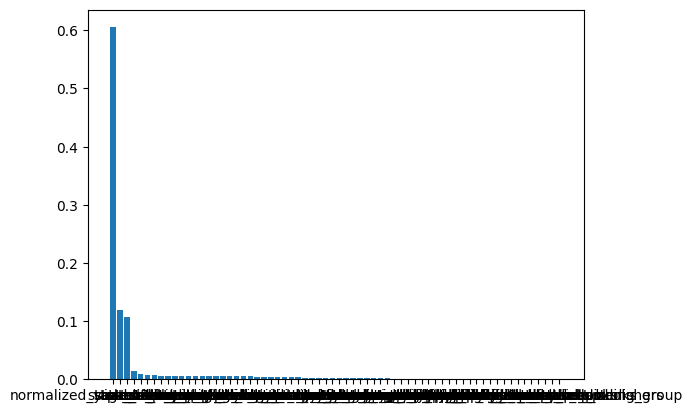

In [28]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [29]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
44,country_usa,0.006231
37,country_other,0.005604
28,country_canada,0.003931
43,country_united_kingdom,0.002638
25,country_australia,0.002573
31,country_germany,0.002406
34,country_malaysia,0.002383
38,country_portugal,0.001993
40,country_spain,0.001687
36,country_new_zealand,0.001311


In [30]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
61,state_other,0.013417
47,state_california,0.009284
55,state_new_york,0.006699
50,state_illinois,0.006582
65,state_washington,0.005985
60,state_oregon,0.005646
52,state_michigan,0.005569
51,state_massachusetts,0.005513
49,state_florida,0.005473
62,state_pennsylvania,0.005412


In [31]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
9,publisher_other,0.006254
14,publisher_scholastic,0.003527
2,publisher_ballantine_books,0.003499
10,publisher_penguin_books,0.002918
21,publisher_warner_books,0.002851
18,publisher_st._martin's_press,0.001923
12,publisher_pocket,0.001730
11,publisher_penguin_usa,0.000000
7,publisher_harpercollins,0.000000
13,publisher_random_house_inc,0.000000


In [32]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.60553
Name: Importances, dtype: float64
country_importance: 0.038330729206894475
state_importance: 0.10826878282325243
publisher_importance: 0.022702768297289747
